# Chi-Square Test by `Mr. Harshit Dawar!`
* This test is used to compare the expected value to the observed value, & decide whether to accept or reject the Null Hypothesis or in simple words, whether to select a feature or not!


* It is a Statistical Test.


* It can be used in the case of Categorical Variables/Features Only, it cannot be used with continuous features.


* If the calculated values is more than the Tabular/Critical Value, then the Null Hypothesis is rejected.


* The less the p - value is for a particular feature, the more the significance of that particular feature.


* Chi Square is also known as Fisher Score.

In [1]:
# Importing the Libraries

import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2, SelectKBest

In [21]:
# Loading the Dataset

data = pd.read_csv("../ds/Titanic_Dataset.csv")

In [22]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

***As it can be clearly observed that, only 3 features that are ["Cabin", "Sex", "Embarked"] categorical & can be used to predict the target variable i.e. Survived or not, so, let's begin with them only!***

In [24]:
# Encoding the Categorical Variables
ordinal_label = {value: index for index, value in enumerate(data['Embarked'].unique())}

In [25]:
ordinal_label

{'S': 0, 'C': 1, 'Q': 2, nan: 3}

In [26]:
data.Embarked = data.Embarked.map(ordinal_label)

In [33]:
data.Cabin.fillna("Missing", inplace = True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Missing,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Missing,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Missing,0


In [34]:
def processCabin(category):
    return category[:1]

data["Cabin"] = data["Cabin"].map(processCabin)

In [36]:
ordinal_label = {value: index for index, value in enumerate(data['Cabin'].unique())}
data.Cabin = data.Cabin.map(ordinal_label)

In [37]:
data.Cabin.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [39]:
data.Sex = np.where(data.Sex == "male", 1, 0)

In [40]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0


In [42]:
chi_score = chi2(data[["Sex", "Cabin", "Embarked"]], data.Survived)
chi_score

(array([ 92.70244698, 264.04296163,  14.12425688]),
 array([6.07783826e-22, 2.25565490e-59, 1.71122816e-04]))

In [43]:
pvalues = chi_score[1]
pvalues

array([6.07783826e-22, 2.25565490e-59, 1.71122816e-04])

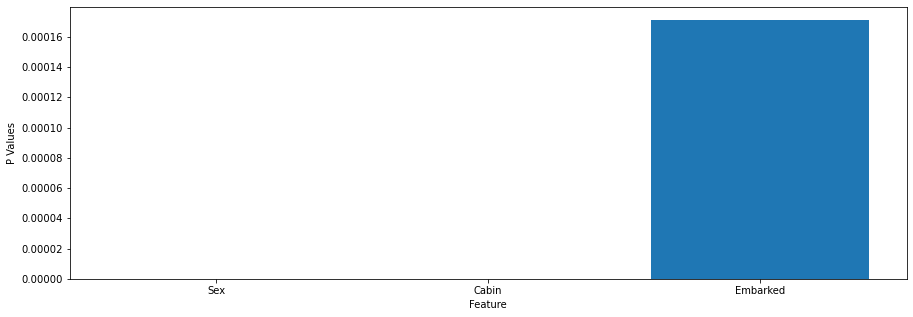

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 5))
plt.bar(["Sex", "Cabin", "Embarked"], pvalues)
plt.xlabel("Feature")
plt.ylabel("P Values")
plt.show()

In [50]:
pvalues.sort()

In [51]:
pvalues

array([2.25565490e-59, 6.07783826e-22, 1.71122816e-04])

## Selecting Features using SelectKBest, Selecting the best predictor among the three!

In [54]:
Feature_Selector = SelectKBest(chi2, k = 1).fit(data[["Sex", "Cabin", "Embarked"]], data.Survived)

In [55]:
Feature_Selector.get_support()

array([False,  True, False])

***As True comes at the place of the Cabin, that means it is the best predictor!***

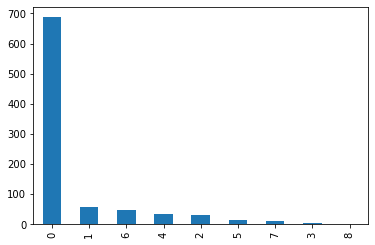

In [112]:
data.Cabin.value_counts().plot(kind = "bar")
plt.show()

### Plotting Survived Bar Chart based On Sex to check its importance!

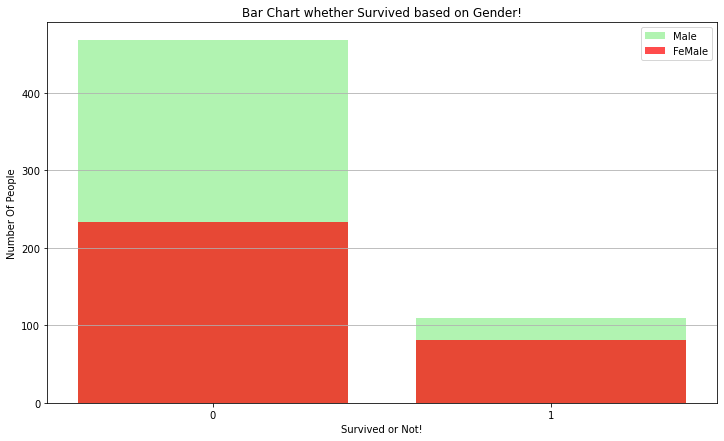

In [109]:
plt.figure(figsize = (12, 7))
plt.bar(range(len(data.Survived.unique())),
        data.Survived[data['Sex'] == 1].value_counts(),
        label = "Male",
        alpha = 0.7,
        color = "lightgreen")

plt.bar(range(len(data.Survived.unique())),
        data.Survived[data['Sex'] == 0].value_counts(),
        label = "FeMale",
        alpha = 0.7,
        color = "red")

plt.xticks(ticks = range(len(data.Survived.unique())), labels = data.Survived.unique())
plt.legend()
plt.grid(b = True, axis = "y")
plt.xlabel("Survived or Not!")
plt.ylabel("Number Of People")
plt.title("Bar Chart whether Survived based on Gender!")
plt.show()

***It is cleat that Sex is clear predictor of the Target Variable, but in the study till now, it is been shown that the Cabin is the best predictor, it might be because of the reason that Cabin Feature has a lot of missing values, but since we filled them with the dummy values, that is why somehow it becomes the most predictable feature, event though it might not be a one. Therefore, it is on the data scientist itself, how to play with the features because Feature Selection comes after the preprocessing of the features!***

# Congratulations, you have learned a new Filter Method to select the Features!